In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi
import scipy.stats
import numpy as np
import random
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Cargando datos

In [2]:
red = pd.read_csv('winequality-red.csv', low_memory=False, sep=';')
white = pd.read_csv('winequality-white.csv', low_memory=False, sep=';')



#white = white.sample(1599)

wines = pd.concat([white, red], axis=0)

wines.shape





(6497, 12)

In [21]:
red.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
white.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [22]:
wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


# Visualizando matriz de correlación para Vinos Tinto

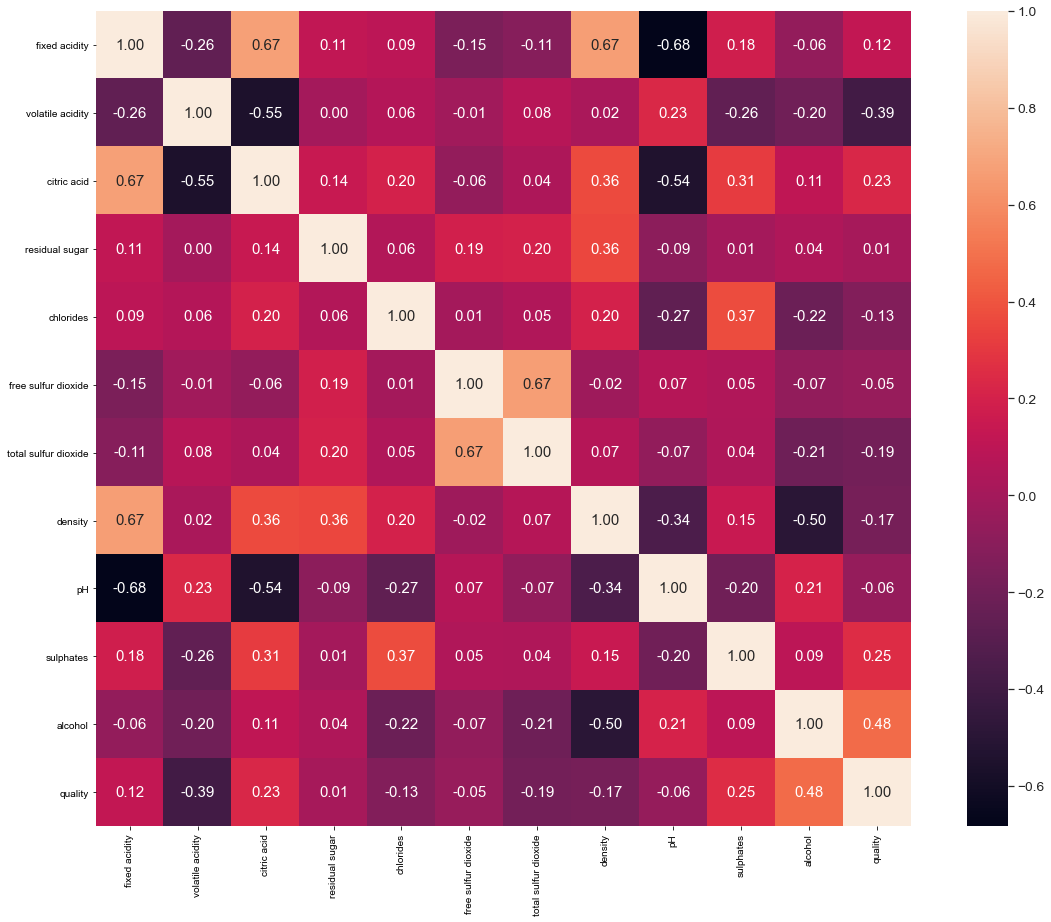

In [46]:
plt.subplots(figsize=(20,15))
corrmat = red.corr()
corrmat = np.abs(corrmat)
cm = np.corrcoef(red.values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=red.columns.values, xticklabels=red.columns.values)
plt.show()

# Visualizando matriz de correlación de vinos blanco

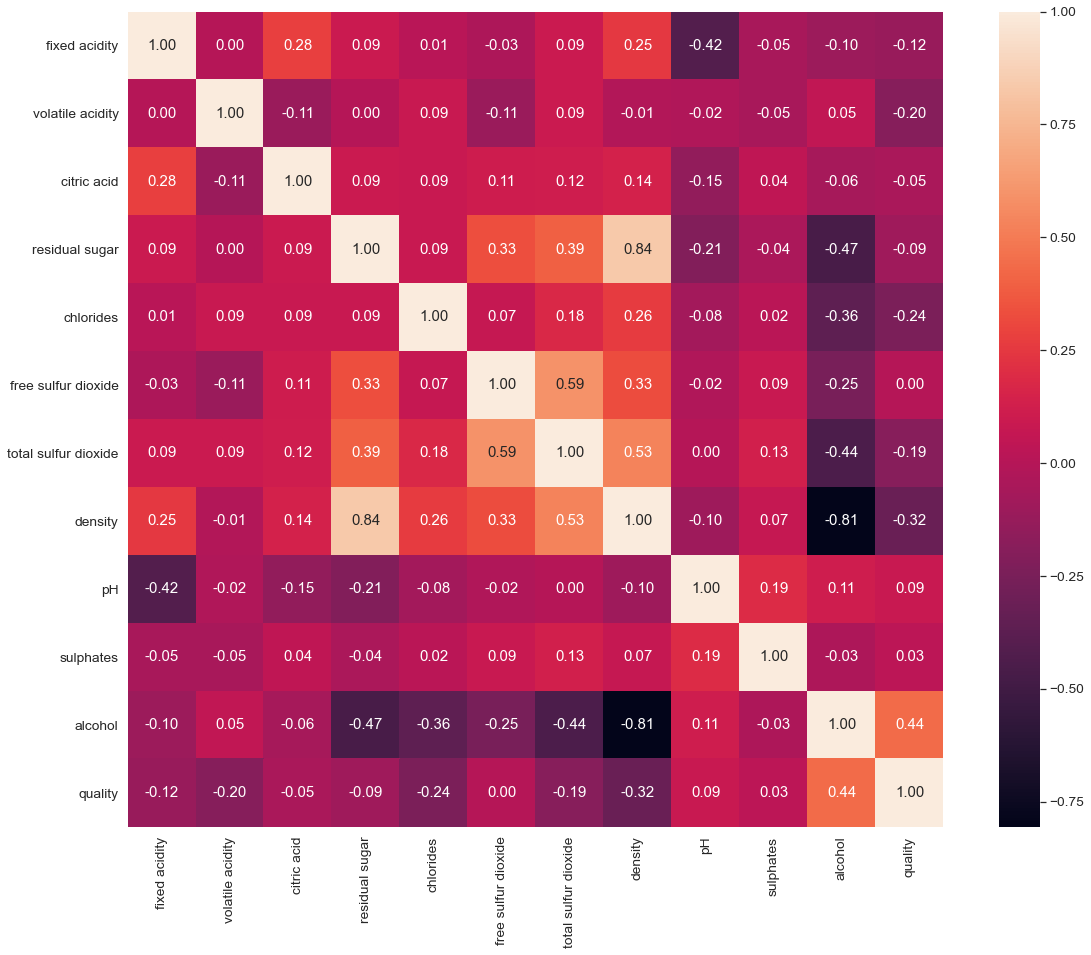

In [69]:
plt.subplots(figsize=(20,15))
corrmat = white.corr()
corrmat = np.abs(corrmat)
cm = np.corrcoef(white.values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=white.columns.values, xticklabels=white.columns.values)
plt.show()

# Visualizando matriz de correlación de ambos vinos 

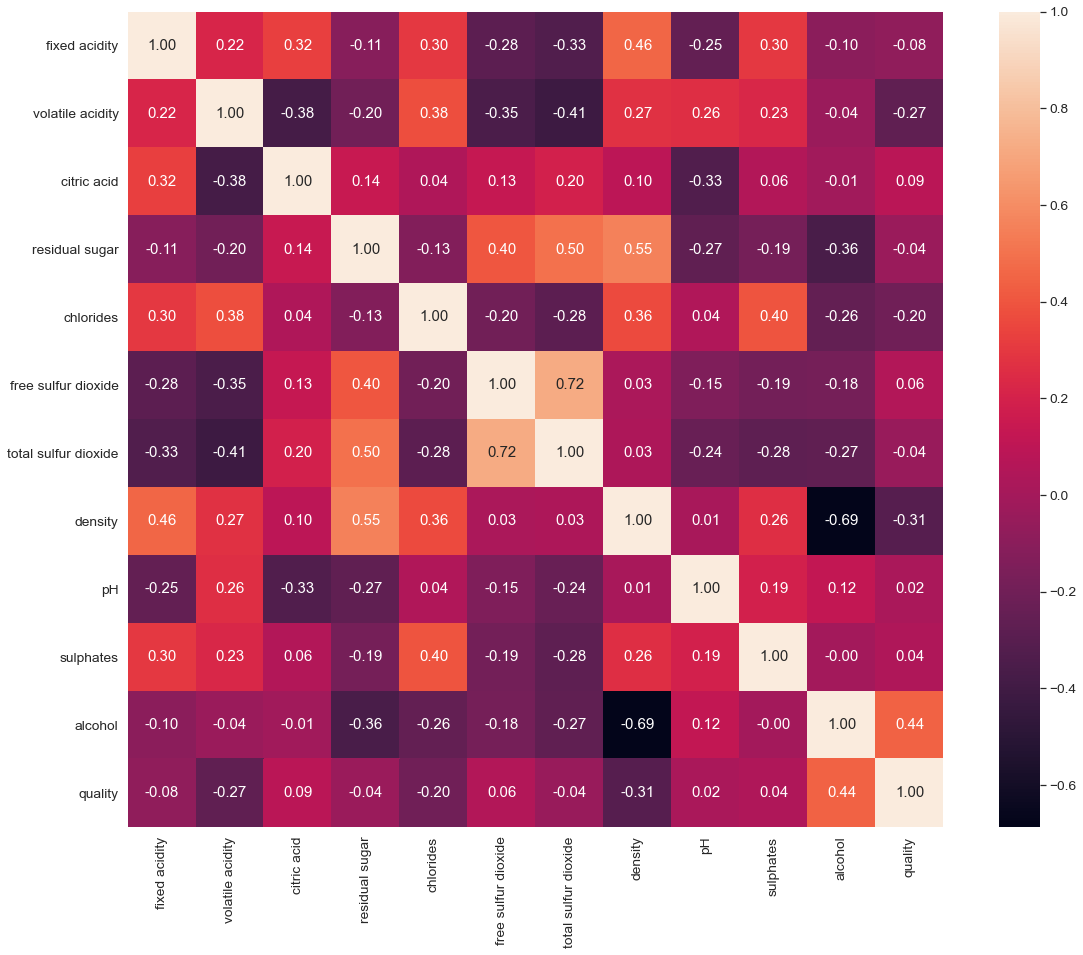

In [23]:
plt.subplots(figsize=(20,15))
corrmat = wines.corr()
corrmat = np.abs(corrmat)
cm = np.corrcoef(wines.values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=wines.columns.values, xticklabels=wines.columns.values)
plt.show()

# Visualizando matriz de correlación de ambos vinos  en partes iguales

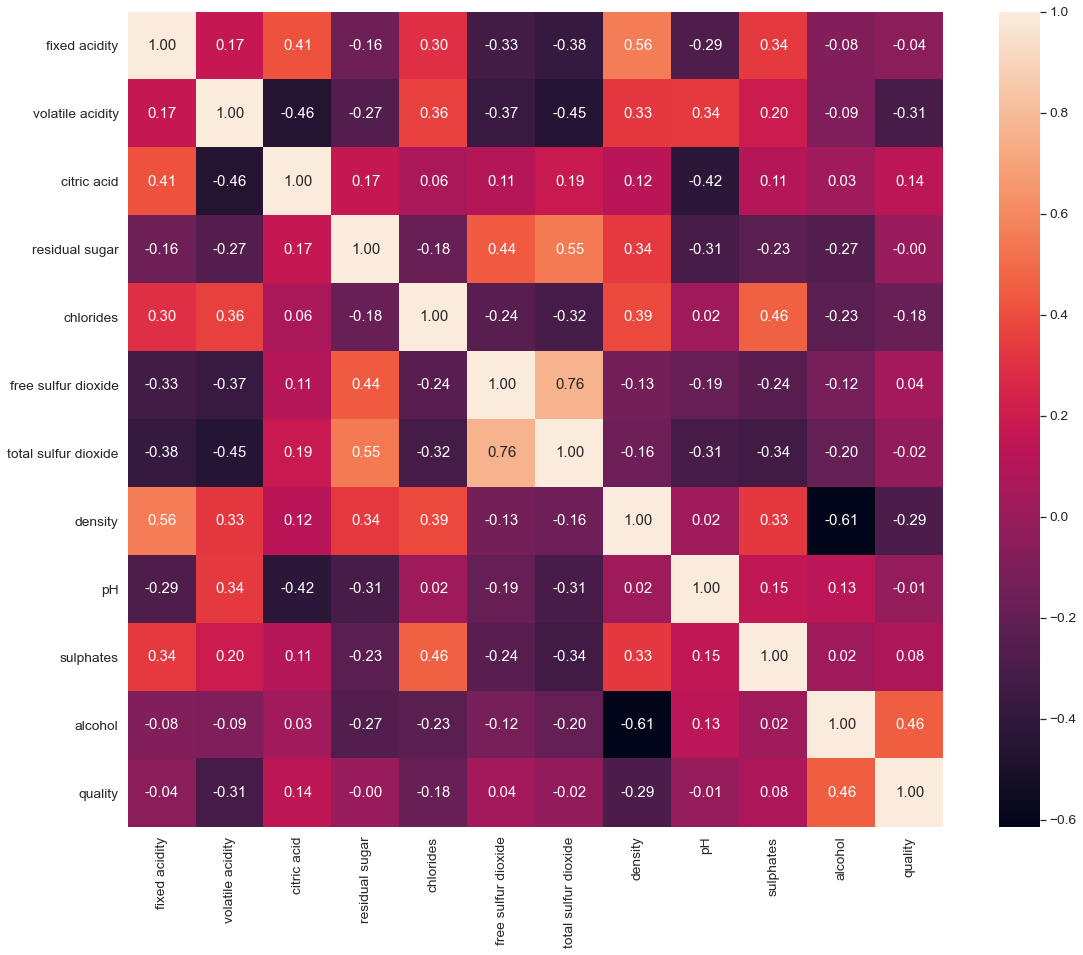

In [129]:
plt.subplots(figsize=(20,15))
corrmat = wines.corr()
corrmat = np.abs(corrmat)
cm = np.corrcoef(wines.values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=wines.columns.values, xticklabels=wines.columns.values)
plt.show()

# Modelado

In [3]:

def set_category_q(wine_set):
    etiquetas = {1:0, 2:0, 3: 0, 4: 0, 5: 0, 6: 1, 7: 2, 8: 2, 9: 2, 10:2}
    wine_set['q_categorico'] = wine_set['quality'].map(etiquetas)
    #sns.countplot('q_categorico', data = wines)
    wine_set.head()
    
    
    
    

In [128]:
def set_train_test(wine_set):
    """predictors = wine_set[["density", 'alcohol', 'sulphates', 'pH', 'volatile_acidity', 'chlorides', 
    'fixed_acidity','citric_acid', 'residual_sugar', 'free_sulfur_dioxide', 'total_sulfur_dioxide']]"""

    x = wine_set[wine_set.columns[:-2]].values
    
    features = wine_set.columns[:-2]
    
# 
    y = wine_set['q_categorico']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)
    

    

    
    random_forest = RandomForestClassifier(n_estimators=100,max_depth= 10)
    random_forest.fit(x_train, y_train)
    y_pred = random_forest.predict(x_test)
    random_forest.score(x_train, y_train)
    print(classification_report(y_test,y_pred))

    variable_importante(random_forest, x_train, features)
    
    return (x_test, y_test)
 


In [34]:
def variable_importante(forest, X, features): 
    #features_importance = random_forest.feature_importances_
    
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]
    
    # Print the feature ranking
    print("Ranking de caracteristicas:")

    for f in range(X.shape[1]):
        #print(X[f])
        print("%d. Caracteristica %d : %s (%f)" % (f + 1, indices[f], features[indices[f]],  importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    plt.figure()
    plt.title("Ranking de caracteristicas")
    plt.bar(range(X.shape[1]), importances[indices],
            color="rgbkymc", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)

    plt.xlim([-1, X.shape[1]])
    #plt.xlim(features)
    plt.show()

# Entrenamiento (vino rojo)

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       230
           1       0.67      0.61      0.64       195
           2       0.56      0.51      0.53        55

    accuracy                           0.70       480
   macro avg       0.66      0.65      0.65       480
weighted avg       0.69      0.70      0.69       480

Ranking de caracteristicas:
1. Caracteristica 10 : alcohol (0.160378)
2. Caracteristica 9 : sulphates (0.131626)
3. Caracteristica 1 : volatile acidity (0.114808)
4. Caracteristica 6 : total sulfur dioxide (0.103652)
5. Caracteristica 7 : density (0.087634)
6. Caracteristica 4 : chlorides (0.074882)
7. Caracteristica 0 : fixed acidity (0.071896)
8. Caracteristica 8 : pH (0.068332)
9. Caracteristica 2 : citric acid (0.064107)
10. Caracteristica 3 : residual sugar (0.061805)
11. Caracteristica 5 : free sulfur dioxide (0.060881)


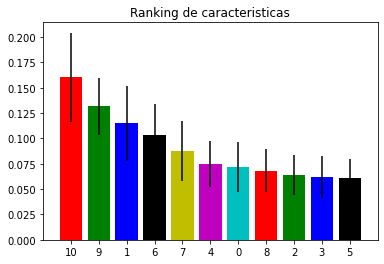

In [129]:
wine_set= red
set_category_q(wine_set)
result=set_train_test(wine_set)

# Reportes (vino rojo)


In [15]:
report = pd.DataFrame(result[0], columns=red.columns[:-2])
quality = []
cat = {0:"Malo", 1:"Normal", 2:"Bueno"}
for i in result[1]:
    quality.append(i)

report['Calidad'] = quality
report.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Calidad
0,8.8,0.41,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,0
1,8.7,0.63,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,1
2,10.4,0.34,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,1
3,7.1,0.46,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,1
4,7.1,0.39,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,1


# Entrenamiento (vino blanco)

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       481
           1       0.64      0.77      0.70       655
           2       0.79      0.60      0.68       334

    accuracy                           0.70      1470
   macro avg       0.73      0.68      0.70      1470
weighted avg       0.71      0.70      0.70      1470

Ranking de caracteristicas:
1. Caracteristica 10 : alcohol (0.132829)
2. Caracteristica 7 : density (0.108977)
3. Caracteristica 1 : volatile acidity (0.108386)
4. Caracteristica 5 : free sulfur dioxide (0.092469)
5. Caracteristica 6 : total sulfur dioxide (0.084671)
6. Caracteristica 8 : pH (0.082978)
7. Caracteristica 3 : residual sugar (0.082792)
8. Caracteristica 4 : chlorides (0.082270)
9. Caracteristica 2 : citric acid (0.080644)
10. Caracteristica 9 : sulphates (0.073897)
11. Caracteristica 0 : fixed acidity (0.070087)


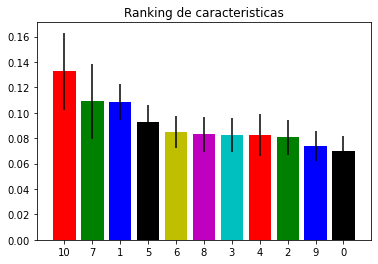

In [70]:
wine_set= white
set_category_q(wine_set)
result=set_train_test(wine_set)

# Reportes (vino blanco)

In [17]:
report = pd.DataFrame(result[0], columns=white.columns[:-2])
quality = []
cat = {0:"Malo", 1:"Normal", 2:"Bueno"}
for i in result[1]:
    quality.append(i)

report['Calidad'] = quality
report.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Calidad
0,6.2,0.38,0.18,7.4,0.095,28.0,195.0,0.99773,3.53,0.71,9.2,0
1,6.4,0.25,0.74,7.8,0.045,52.0,209.0,0.99560,3.21,0.42,9.2,1
2,6.4,0.25,0.37,4.5,0.039,41.0,147.0,0.99210,3.18,0.40,11.1,2
3,6.3,0.26,0.25,7.8,0.058,44.0,166.0,0.99610,3.24,0.41,9.0,0
4,7.1,0.36,0.37,4.8,0.019,39.0,114.0,0.99036,3.08,0.49,12.7,2


# Entrenamiento (ambos vinos)


              precision    recall  f1-score   support

           0       0.78      0.74      0.76       712
           1       0.67      0.75      0.71       837
           2       0.75      0.64      0.69       401

    accuracy                           0.72      1950
   macro avg       0.73      0.71      0.72      1950
weighted avg       0.73      0.72      0.72      1950

Ranking de caracteristicas:
1. Caracteristica 10 : alcohol (0.143762)
2. Caracteristica 1 : volatile acidity (0.105789)
3. Caracteristica 7 : density (0.099935)
4. Caracteristica 6 : total sulfur dioxide (0.088013)
5. Caracteristica 4 : chlorides (0.086428)
6. Caracteristica 9 : sulphates (0.083915)
7. Caracteristica 5 : free sulfur dioxide (0.083168)
8. Caracteristica 8 : pH (0.081173)
9. Caracteristica 3 : residual sugar (0.078925)
10. Caracteristica 2 : citric acid (0.077883)
11. Caracteristica 0 : fixed acidity (0.071009)


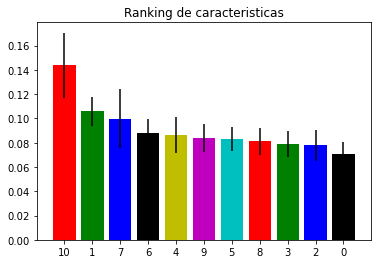

In [121]:
wine_set= wines
set_category_q(wine_set)
result=set_train_test(wine_set)

# Reportes (ambos vinos)


In [26]:

report = pd.DataFrame(result[0], columns=wines.columns[:-2])
quality = []
cat = {0:"Malo", 1:"Normal", 2:"Bueno"}
for i in result[1]:
    quality.append(cat[i])

report['Calidad'] = quality
report.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Calidad
0,7.2,0.35,0.25,5.6,0.032,23.0,120.0,0.99334,2.93,0.66,10.3,Bueno
1,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,Bueno
2,10.1,0.45,0.23,1.9,0.082,10.0,18.0,0.99774,3.22,0.65,9.3,Normal
3,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,Malo
4,6.8,0.28,0.60,1.1,0.132,42.0,127.0,0.99340,3.09,0.44,9.1,Normal


# Entrenamiento (ambos vino en partes iguales)

              precision    recall  f1-score   support

           0       0.77      0.74      0.75       712
           1       0.66      0.75      0.70       837
           2       0.78      0.63      0.69       401

    accuracy                           0.72      1950
   macro avg       0.74      0.70      0.72      1950
weighted avg       0.73      0.72      0.72      1950

Ranking de caracteristicas:
1. Caracteristica 10 : alcohol (0.144234)
2. Caracteristica 1 : volatile acidity (0.102783)
3. Caracteristica 7 : density (0.101882)
4. Caracteristica 4 : chlorides (0.089110)
5. Caracteristica 6 : total sulfur dioxide (0.085770)
6. Caracteristica 5 : free sulfur dioxide (0.083732)
7. Caracteristica 9 : sulphates (0.081218)
8. Caracteristica 8 : pH (0.081158)
9. Caracteristica 2 : citric acid (0.080043)
10. Caracteristica 3 : residual sugar (0.079131)
11. Caracteristica 0 : fixed acidity (0.070939)


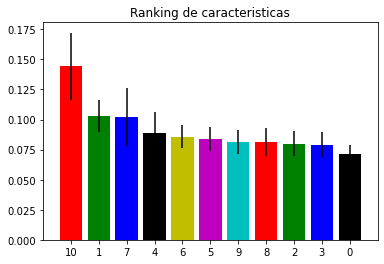

In [101]:
wine_set= wines
set_category_q(wine_set)
result=set_train_test(wine_set)

# Reportes (ambos vino en partes iguales)

In [38]:
report = pd.DataFrame(result[0], columns=wines.columns[:-2])
quality = []
cat = {0:"Malo", 1:"Normal", 2:"Bueno"}
for i in result[1]:
    quality.append(cat[i])

report['Calidad'] = quality
report.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Calidad
0,7.2,0.35,0.25,5.6,0.032,23.0,120.0,0.99334,2.93,0.66,10.3,Bueno
1,8.6,0.42,0.39,1.8,0.068,6.0,12.0,0.99516,3.35,0.69,11.7,Bueno
2,10.1,0.45,0.23,1.9,0.082,10.0,18.0,0.99774,3.22,0.65,9.3,Normal
3,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.99680,3.06,1.26,9.4,Malo
4,6.8,0.28,0.60,1.1,0.132,42.0,127.0,0.99340,3.09,0.44,9.1,Normal


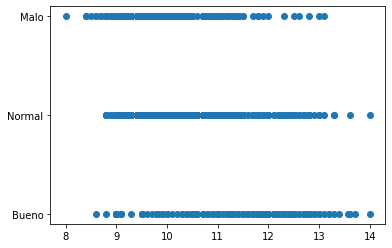

In [39]:
#Alcohol
fig, ax = plt.subplots()
ax.scatter(report['alcohol'],report['Calidad'])
plt.show()

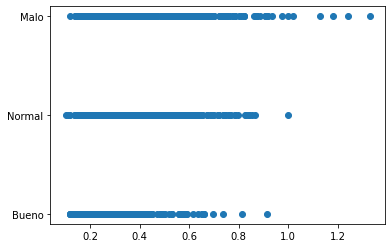

In [34]:

fig, ax = plt.subplots()

ax.scatter(report['volatile acidity'],report['Calidad'])
plt.show()

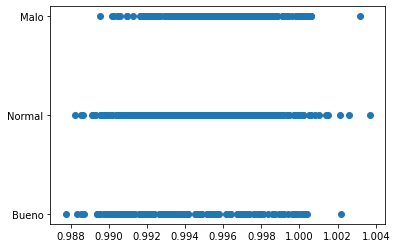

In [35]:

fig, ax = plt.subplots()

ax.scatter(report['density'],report['Calidad'])
plt.show()

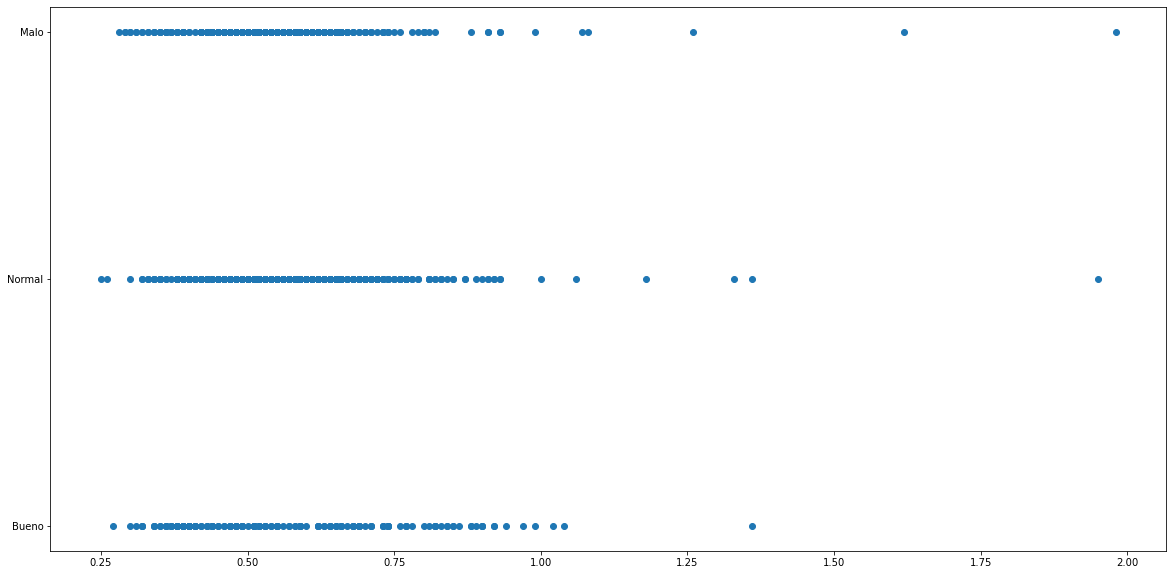

In [43]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.scatter(report['sulphates'],report['Calidad'])
plt.show()

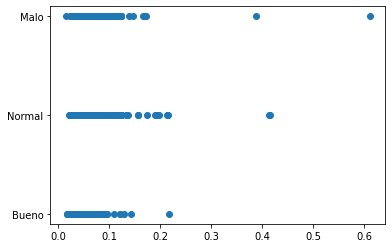

In [42]:

fig, ax = plt.subplots()

ax.scatter(report['chlorides'],report['Calidad'])
plt.show()

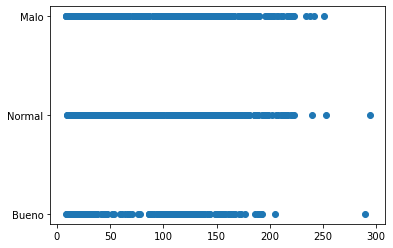

In [44]:
 
fig, ax = plt.subplots()

ax.scatter(report['total sulfur dioxide'],report['Calidad'])
plt.show()

# Vino rojo (eliminando correlaciones altas)

In [138]:
red_criterio_1 = red.drop(columns=['fixed acidity', 'free sulfur dioxide'])
red_criterio_1.head()
wine_set= red_criterio_1




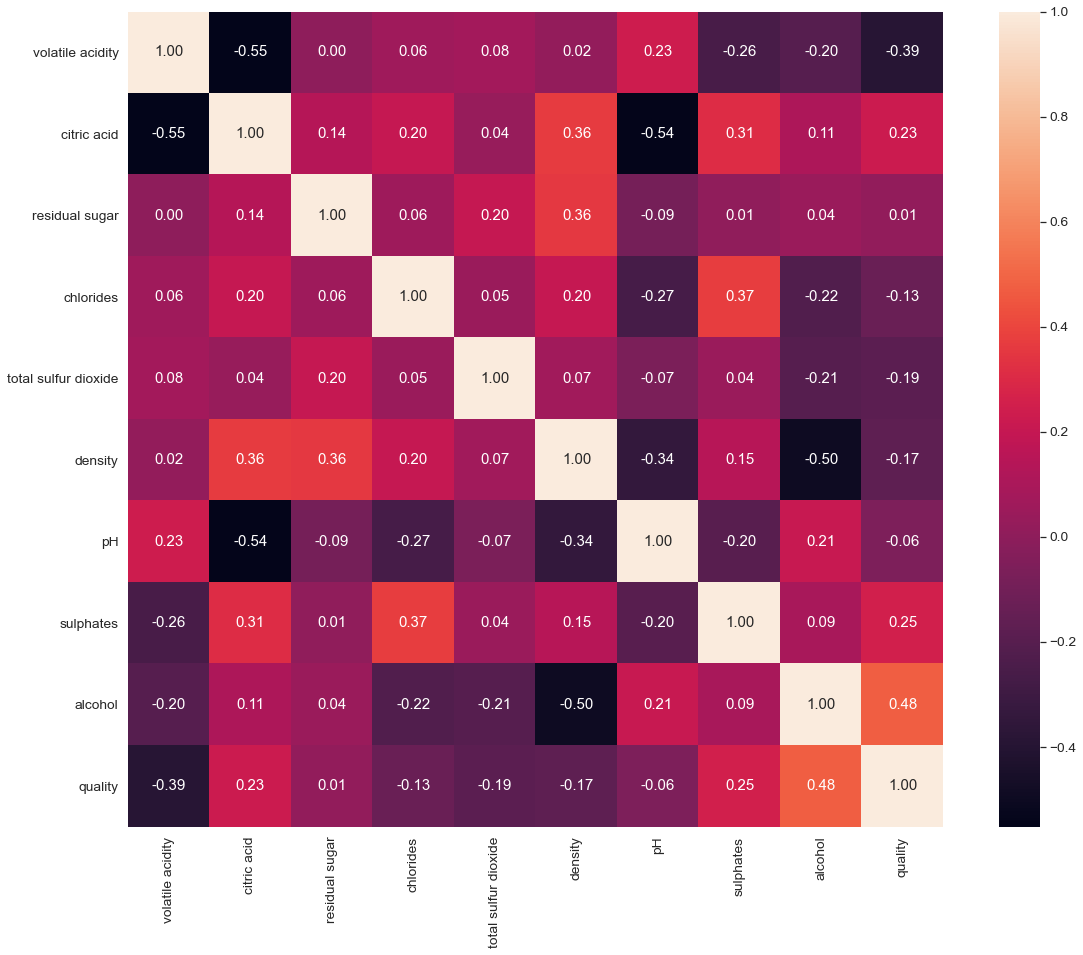

In [154]:
plt.subplots(figsize=(20,15))
corrmat = wine_set.corr()
corrmat = np.abs(corrmat)
cm = np.corrcoef(wine_set.values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=wine_set.columns.values, xticklabels=wine_set.columns.values)
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       230
           1       0.69      0.67      0.68       195
           2       0.67      0.55      0.60        55

    accuracy                           0.73       480
   macro avg       0.71      0.68      0.69       480
weighted avg       0.73      0.73      0.73       480

Ranking de caracteristicas:
1. Caracteristica 8 : alcohol (0.186118)
2. Caracteristica 7 : sulphates (0.144444)
3. Caracteristica 4 : total sulfur dioxide (0.124805)
4. Caracteristica 0 : volatile acidity (0.122361)
5. Caracteristica 5 : density (0.098813)
6. Caracteristica 6 : pH (0.083909)
7. Caracteristica 3 : chlorides (0.083667)
8. Caracteristica 1 : citric acid (0.079595)
9. Caracteristica 2 : residual sugar (0.076288)


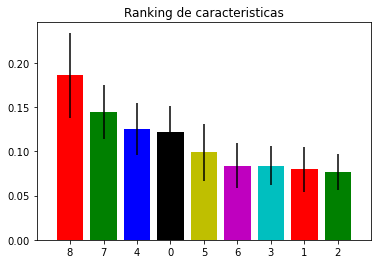

In [142]:

set_category_q(wine_set)
result=set_train_test(wine_set)

# Vino rojo (eliminando variables menos importantes)

In [143]:
red_criterio_1 = red.drop(columns=['fixed acidity', 'free sulfur dioxide', 'residual sugar'])
red_criterio_1.head()
wine_set= red_criterio_1


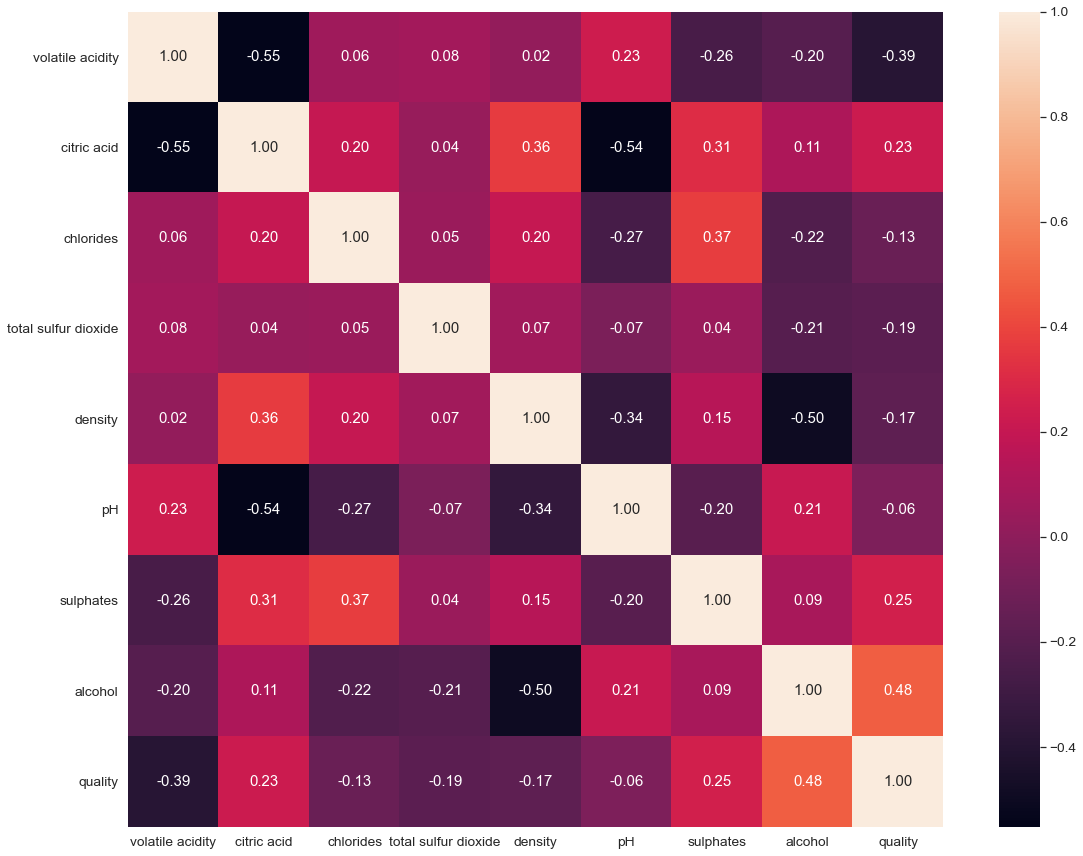

In [66]:
plt.subplots(figsize=(20,15))
corrmat = wine_set.corr()
corrmat = np.abs(corrmat)
cm = np.corrcoef(wine_set.values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=wine_set.columns.values, xticklabels=wine_set.columns.values)
plt.show()

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       230
           1       0.67      0.66      0.66       195
           2       0.59      0.47      0.53        55

    accuracy                           0.72       480
   macro avg       0.68      0.65      0.66       480
weighted avg       0.71      0.72      0.71       480

Ranking de caracteristicas:
1. Caracteristica 7 : alcohol (0.175132)
2. Caracteristica 6 : sulphates (0.153128)
3. Caracteristica 0 : volatile acidity (0.134150)
4. Caracteristica 3 : total sulfur dioxide (0.132891)
5. Caracteristica 4 : density (0.117855)
6. Caracteristica 2 : chlorides (0.099961)
7. Caracteristica 5 : pH (0.095415)
8. Caracteristica 1 : citric acid (0.091468)


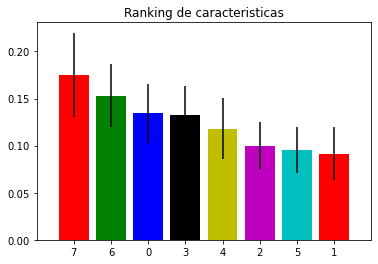

In [152]:
set_category_q(wine_set)
result=set_train_test(wine_set)

# Vino blanco (eliminar correlaciones altas)

In [71]:
white_criterio_1 = white.drop(columns=['residual sugar', 'total sulfur dioxide'])
white_criterio_1.head()
wine_set= white_criterio_1


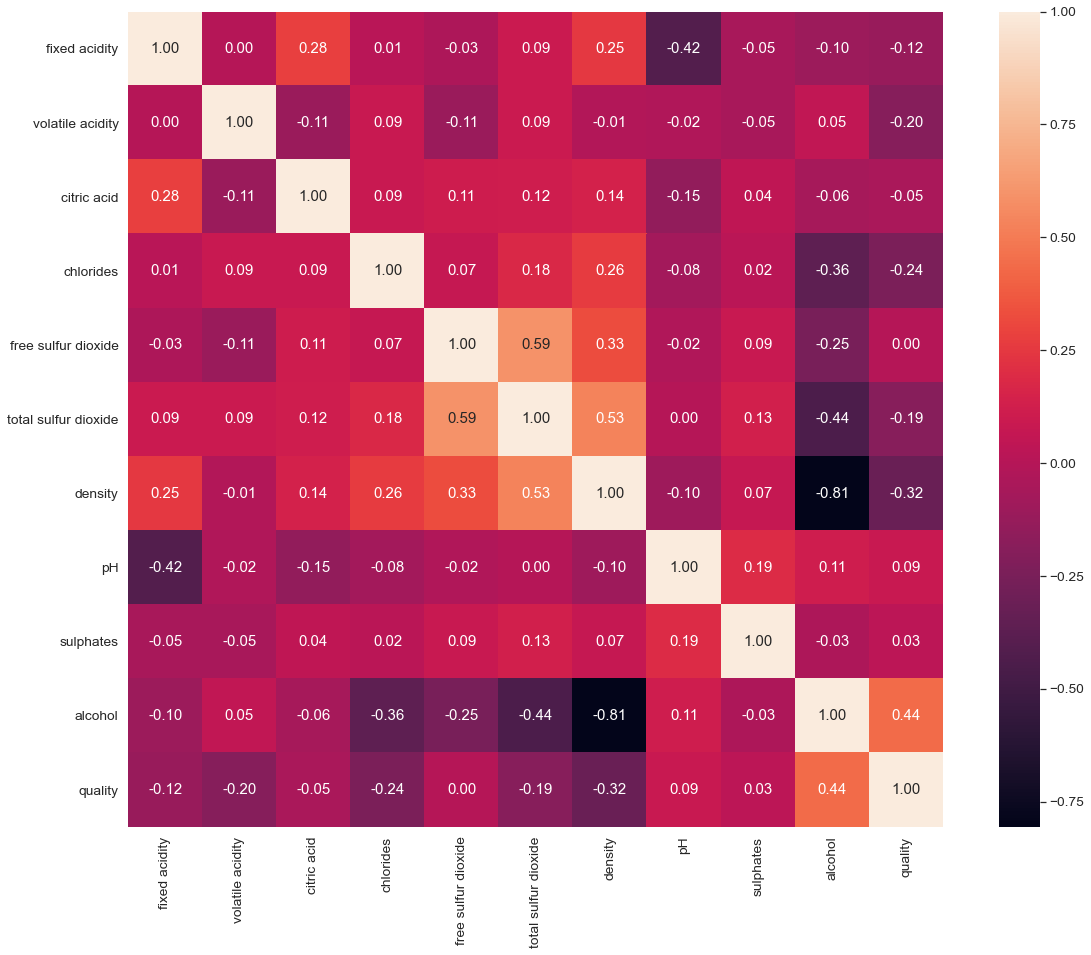

In [81]:
plt.subplots(figsize=(20,15))
corrmat = wine_set.corr()
corrmat = np.abs(corrmat)
cm = np.corrcoef(wine_set.values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=wine_set.columns.values, xticklabels=wine_set.columns.values)
plt.show()

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       481
           1       0.63      0.78      0.70       655
           2       0.80      0.57      0.67       334

    accuracy                           0.70      1470
   macro avg       0.73      0.67      0.69      1470
weighted avg       0.71      0.70      0.69      1470

Ranking de caracteristicas:
1. Caracteristica 8 : alcohol (0.145342)
2. Caracteristica 5 : density (0.135313)
3. Caracteristica 1 : volatile acidity (0.124441)
4. Caracteristica 4 : free sulfur dioxide (0.114078)
5. Caracteristica 6 : pH (0.102188)
6. Caracteristica 3 : chlorides (0.101400)
7. Caracteristica 2 : citric acid (0.099724)
8. Caracteristica 7 : sulphates (0.091683)
9. Caracteristica 0 : fixed acidity (0.085831)


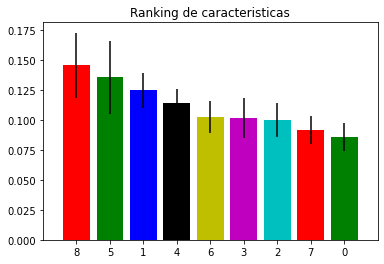

In [72]:
set_category_q(wine_set)
result=set_train_test(wine_set)

# Vino blanco (eliminar variables menos importantes)

In [73]:
white_criterio_1 = white.drop(columns=['sulphates', 'fixed acidity'])
white_criterio_1.head()
wine_set= white_criterio_1

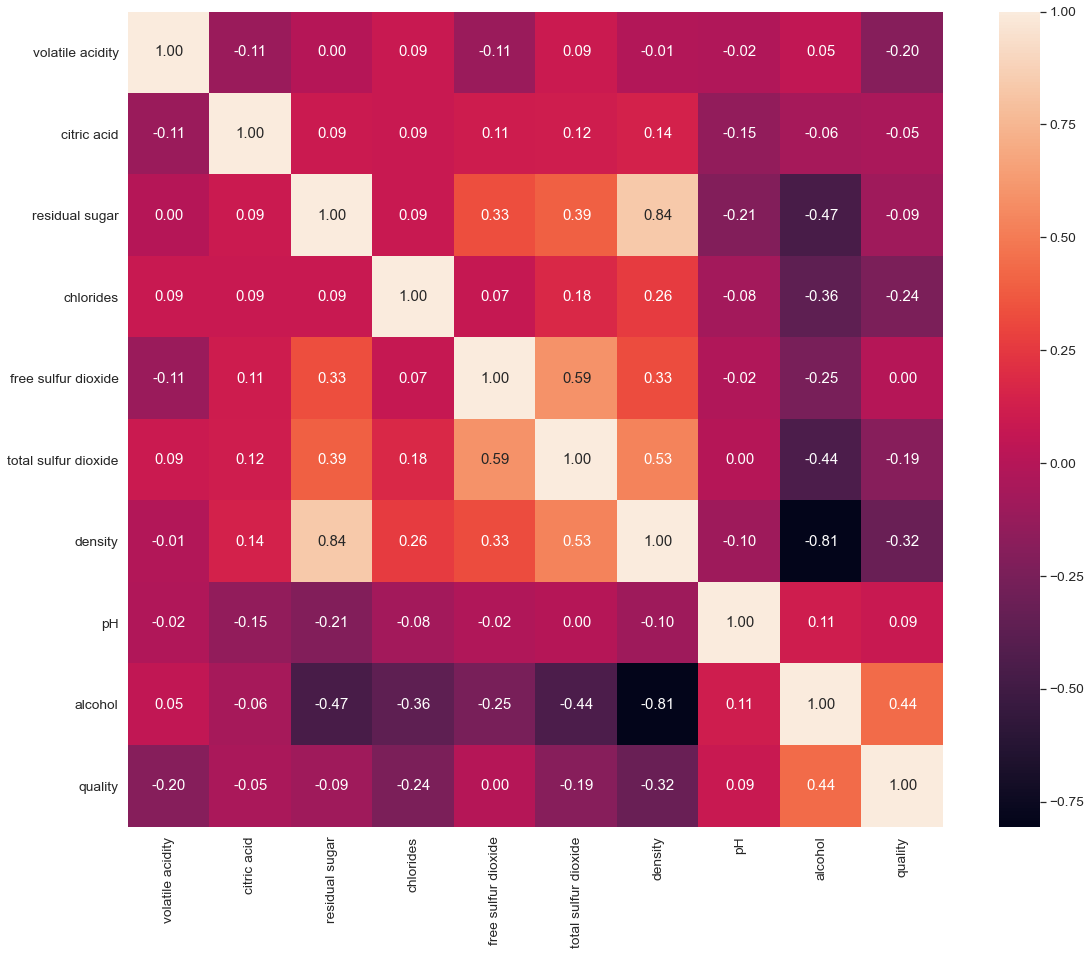

In [85]:
plt.subplots(figsize=(20,15))
corrmat = wine_set.corr()
corrmat = np.abs(corrmat)
cm = np.corrcoef(wine_set.values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=wine_set.columns.values, xticklabels=wine_set.columns.values)
plt.show()

              precision    recall  f1-score   support

           0       0.75      0.68      0.71       481
           1       0.65      0.76      0.70       655
           2       0.76      0.60      0.67       334

    accuracy                           0.70      1470
   macro avg       0.72      0.68      0.69      1470
weighted avg       0.71      0.70      0.70      1470

Ranking de caracteristicas:
1. Caracteristica 8 : alcohol (0.146670)
2. Caracteristica 6 : density (0.123933)
3. Caracteristica 0 : volatile acidity (0.123694)
4. Caracteristica 4 : free sulfur dioxide (0.109330)
5. Caracteristica 5 : total sulfur dioxide (0.103972)
6. Caracteristica 7 : pH (0.103396)
7. Caracteristica 2 : residual sugar (0.099332)
8. Caracteristica 3 : chlorides (0.096452)
9. Caracteristica 1 : citric acid (0.093221)


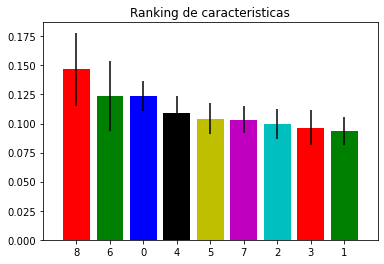

In [74]:
set_category_q(wine_set)
result=set_train_test(wine_set)

# Vino blanco (eliminar variables menos importantes y mayor correlación)

In [75]:
white_criterio_1 = white.drop(columns=['sulphates', 'fixed acidity', 'residual sugar', 'total sulfur dioxide'])
white_criterio_1.head()
wine_set= white_criterio_1

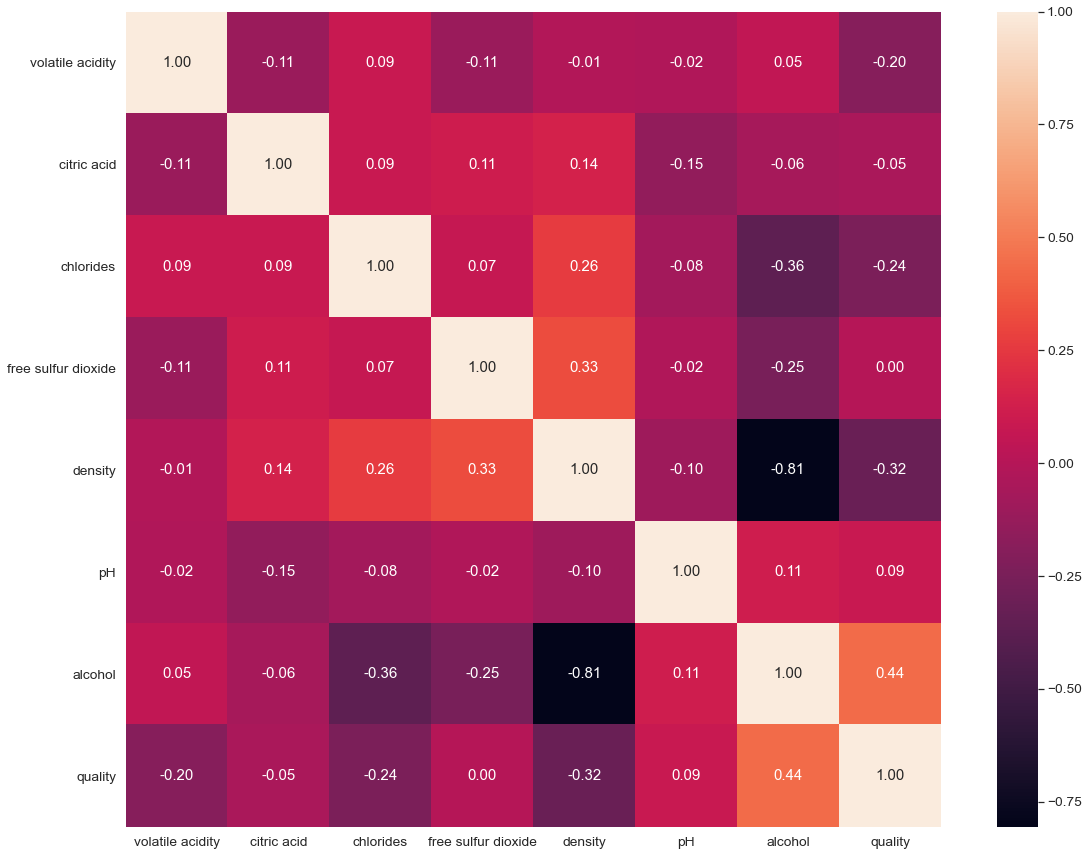

In [91]:
plt.subplots(figsize=(20,15))
corrmat = wine_set.corr()
corrmat = np.abs(corrmat)
cm = np.corrcoef(wine_set.values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=wine_set.columns.values, xticklabels=wine_set.columns.values)
plt.show()

              precision    recall  f1-score   support

           0       0.75      0.67      0.71       481
           1       0.64      0.76      0.69       655
           2       0.74      0.59      0.66       334

    accuracy                           0.69      1470
   macro avg       0.71      0.67      0.69      1470
weighted avg       0.70      0.69      0.69      1470

Ranking de caracteristicas:
1. Caracteristica 6 : alcohol (0.175447)
2. Caracteristica 4 : density (0.160625)
3. Caracteristica 0 : volatile acidity (0.146505)
4. Caracteristica 3 : free sulfur dioxide (0.138523)
5. Caracteristica 5 : pH (0.129434)
6. Caracteristica 2 : chlorides (0.125938)
7. Caracteristica 1 : citric acid (0.123528)


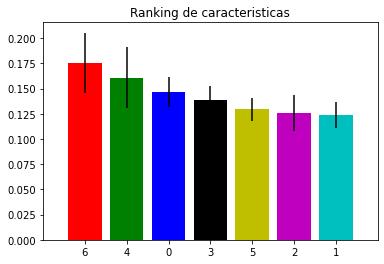

In [76]:
set_category_q(wine_set)
result=set_train_test(wine_set)

# Ambos vinos (eliminar variables de mayor correlación)

In [122]:
wines_criterio_1 = wines.drop(columns=['residual sugar', 'total sulfur dioxide'])
wines_criterio_1.head()
wine_set= wines_criterio_1

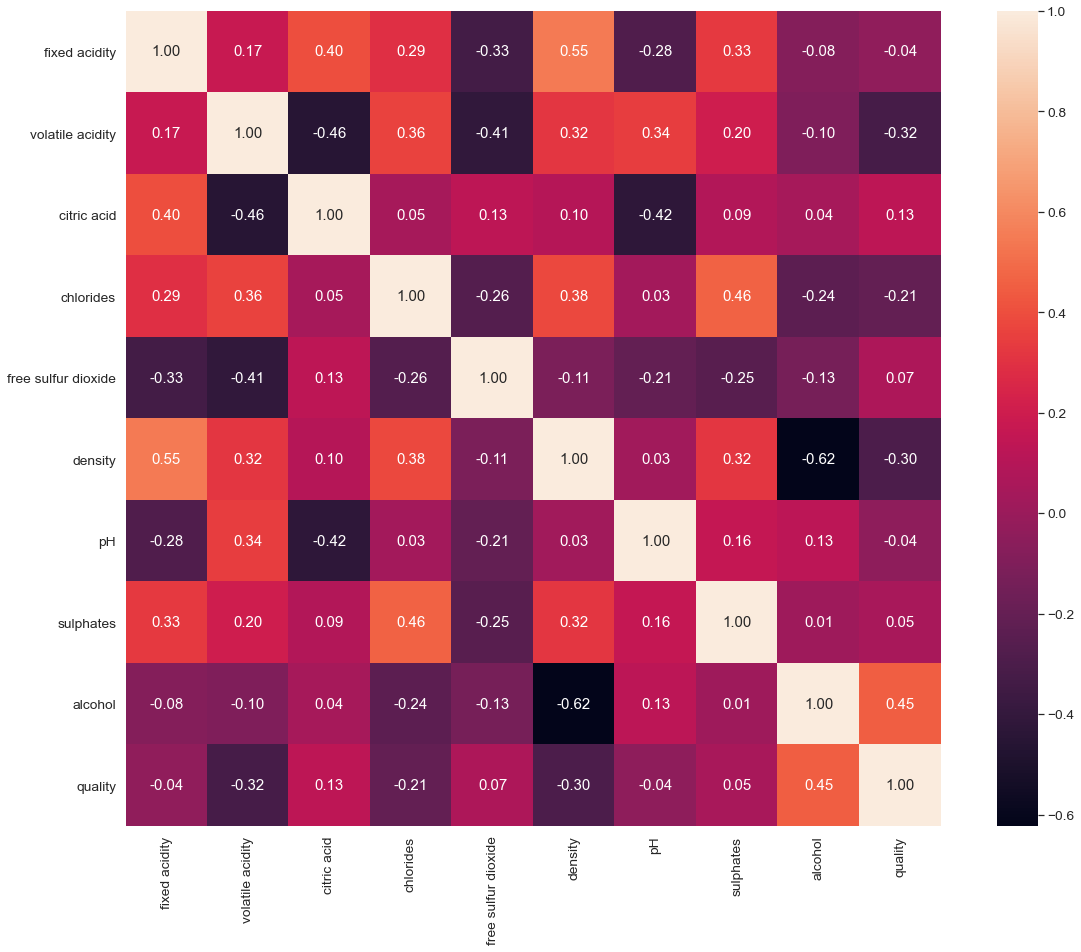

In [110]:
plt.subplots(figsize=(20,15))
corrmat = wine_set.corr()
corrmat = np.abs(corrmat)
cm = np.corrcoef(wine_set.values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=wine_set.columns.values, xticklabels=wine_set.columns.values)
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       712
           1       0.66      0.73      0.70       837
           2       0.76      0.64      0.69       401

    accuracy                           0.72      1950
   macro avg       0.73      0.70      0.72      1950
weighted avg       0.72      0.72      0.72      1950

Ranking de caracteristicas:
1. Caracteristica 8 : alcohol (0.163690)
2. Caracteristica 5 : density (0.123228)
3. Caracteristica 1 : volatile acidity (0.122956)
4. Caracteristica 4 : free sulfur dioxide (0.104874)
5. Caracteristica 3 : chlorides (0.104711)
6. Caracteristica 7 : sulphates (0.099192)
7. Caracteristica 6 : pH (0.099029)
8. Caracteristica 2 : citric acid (0.094765)
9. Caracteristica 0 : fixed acidity (0.087556)


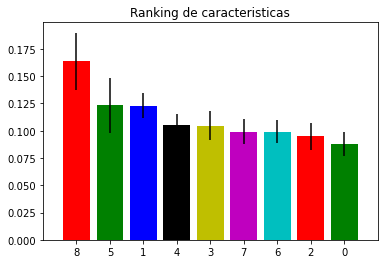

In [123]:
set_category_q(wine_set)
result=set_train_test(wine_set)

# Ambos vino (eliminando variables menos importantes)

In [124]:
wines_criterio_1 = wines.drop(columns=['pH', 'fixed acidity'])
wines_criterio_1.head()
wine_set= wines_criterio_1

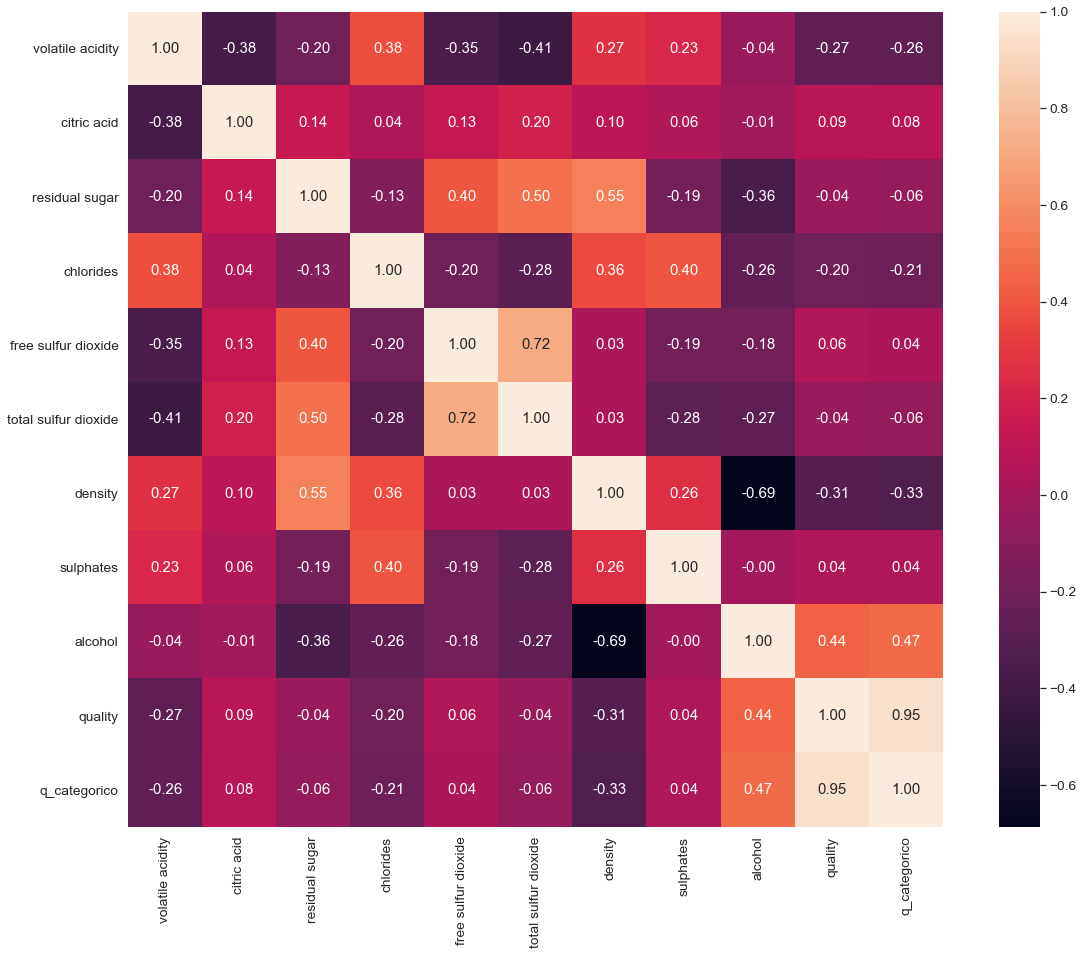

In [118]:
plt.subplots(figsize=(20,15))
corrmat = wine_set.corr()
corrmat = np.abs(corrmat)
cm = np.corrcoef(wine_set.values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 15}, yticklabels=wine_set.columns.values, xticklabels=wine_set.columns.values)
plt.show()

              precision    recall  f1-score   support

           0       0.79      0.75      0.77       712
           1       0.67      0.74      0.71       837
           2       0.74      0.64      0.69       401

    accuracy                           0.72      1950
   macro avg       0.73      0.71      0.72      1950
weighted avg       0.73      0.72      0.72      1950

Ranking de caracteristicas:
1. Caracteristica 8 : alcohol (0.162495)
2. Caracteristica 6 : density (0.121551)
3. Caracteristica 0 : volatile acidity (0.120783)
4. Caracteristica 5 : total sulfur dioxide (0.106188)
5. Caracteristica 7 : sulphates (0.101002)
6. Caracteristica 3 : chlorides (0.099259)
7. Caracteristica 4 : free sulfur dioxide (0.098714)
8. Caracteristica 2 : residual sugar (0.096821)
9. Caracteristica 1 : citric acid (0.093188)


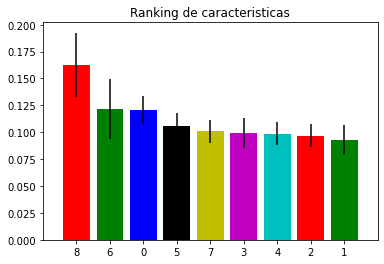

In [125]:
set_category_q(wine_set)
result=set_train_test(wine_set)

# Ambos vinos (mayor correlación y variables menos importantes)

In [126]:
wines_criterio_1 = wines.drop(columns=['pH', 'fixed acidity', 'residual sugar', 'total sulfur dioxide'])
wines_criterio_1.head()
wine_set= wines_criterio_1

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       712
           1       0.66      0.72      0.69       837
           2       0.74      0.64      0.69       401

    accuracy                           0.71      1950
   macro avg       0.72      0.70      0.71      1950
weighted avg       0.71      0.71      0.71      1950

Ranking de caracteristicas:
1. Caracteristica 6 : alcohol (0.187807)
2. Caracteristica 4 : density (0.155798)
3. Caracteristica 0 : volatile acidity (0.145079)
4. Caracteristica 2 : chlorides (0.132961)
5. Caracteristica 3 : free sulfur dioxide (0.131645)
6. Caracteristica 5 : sulphates (0.125213)
7. Caracteristica 1 : citric acid (0.121496)


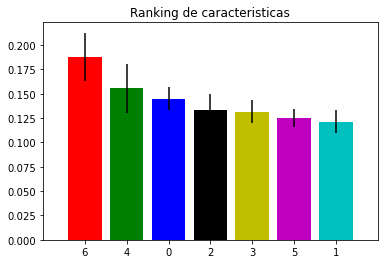

In [127]:
set_category_q(wine_set)
result=set_train_test(wine_set)

# Ambos vinos en partes iguales (eliminar variables de mayor correlación)

In [102]:
wines_criterio_1 = wines.drop(columns=['residual sugar', 'total sulfur dioxide'])
wines_criterio_1.head()
wine_set= wines_criterio_1

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       712
           1       0.66      0.72      0.69       837
           2       0.74      0.63      0.68       401

    accuracy                           0.71      1950
   macro avg       0.72      0.70      0.71      1950
weighted avg       0.71      0.71      0.71      1950

Ranking de caracteristicas:
1. Caracteristica 8 : alcohol (0.165821)
2. Caracteristica 5 : density (0.123474)
3. Caracteristica 1 : volatile acidity (0.120926)
4. Caracteristica 4 : free sulfur dioxide (0.105187)
5. Caracteristica 3 : chlorides (0.103496)
6. Caracteristica 7 : sulphates (0.099479)
7. Caracteristica 6 : pH (0.099204)
8. Caracteristica 2 : citric acid (0.094893)
9. Caracteristica 0 : fixed acidity (0.087521)


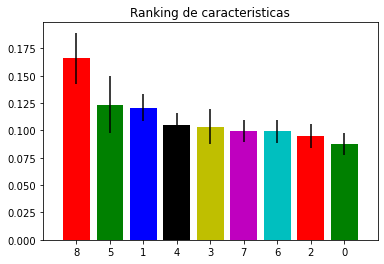

In [105]:
set_category_q(wine_set)
result=set_train_test(wine_set)

# Ambos vinos en partes iguales (eliminar variables de menor importancia)

In [106]:
wines_criterio_1 = wines.drop(columns=['pH', 'fixed acidity'])
wines_criterio_1.head()
wine_set= wines_criterio_1

              precision    recall  f1-score   support

           0       0.78      0.75      0.76       712
           1       0.68      0.75      0.71       837
           2       0.77      0.65      0.70       401

    accuracy                           0.73      1950
   macro avg       0.74      0.71      0.73      1950
weighted avg       0.73      0.73      0.73      1950

Ranking de caracteristicas:
1. Caracteristica 8 : alcohol (0.162344)
2. Caracteristica 0 : volatile acidity (0.120091)
3. Caracteristica 6 : density (0.119832)
4. Caracteristica 5 : total sulfur dioxide (0.105999)
5. Caracteristica 3 : chlorides (0.104077)
6. Caracteristica 4 : free sulfur dioxide (0.100456)
7. Caracteristica 7 : sulphates (0.098341)
8. Caracteristica 2 : residual sugar (0.095346)
9. Caracteristica 1 : citric acid (0.093513)


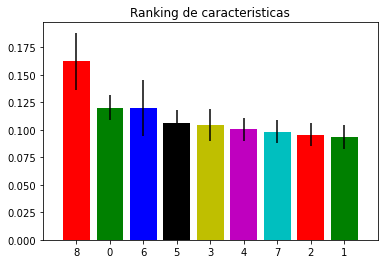

In [107]:
set_category_q(wine_set)
result=set_train_test(wine_set)

# Ambos vinos en partes iguales (mayor correlación y variables menos importantes)

In [108]:
wines_criterio_1 = wines.drop(columns=['pH', 'fixed acidity', 'residual sugar', 'total sulfur dioxide'])
wines_criterio_1.head()
wine_set= wines_criterio_1

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       712
           1       0.66      0.72      0.69       837
           2       0.74      0.63      0.68       401

    accuracy                           0.71      1950
   macro avg       0.72      0.70      0.71      1950
weighted avg       0.71      0.71      0.71      1950

Ranking de caracteristicas:
1. Caracteristica 6 : alcohol (0.181825)
2. Caracteristica 4 : density (0.159528)
3. Caracteristica 0 : volatile acidity (0.145313)
4. Caracteristica 2 : chlorides (0.136909)
5. Caracteristica 3 : free sulfur dioxide (0.130108)
6. Caracteristica 5 : sulphates (0.125214)
7. Caracteristica 1 : citric acid (0.121102)


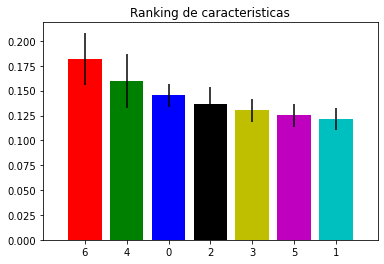

In [111]:
set_category_q(wine_set)
result=set_train_test(wine_set)